In [12]:
#Data Generation
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
degree = 2

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-',linewidth=2, label='Training')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3, label='Validation')
    plt.legend()

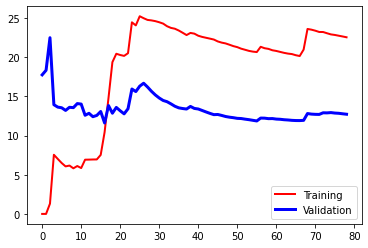

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

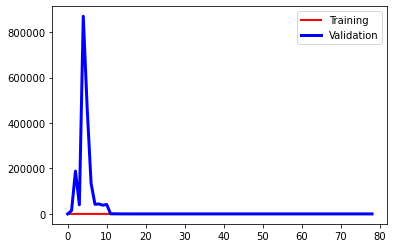

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_reg = make_pipeline(PolynomialFeatures(degree=10,include_bias=False), LinearRegression())
plot_learning_curve(poly_reg,X,y)